In [1]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import csv
import os
import sys

In [3]:
folder = "./"
name_gyro = "gyro_data_4.csv"
name_acc = "acc_data_4.csv"

#new_name_acc = "clockwise_rot_acc.csv"

In [4]:
mpl.rcParams['legend.fontsize'] = 10

In [5]:
def to_rad(theta):
    return theta * np.pi/180

In [6]:
class MyPoint:
    def __init__(self, x = 0, y = 0, z = 0):
        self.x, self.y, self.z = float(x), float(y), float(z)
    
    def x_point(self, theta):
        #theta = to_rad(theta)
        b = np.cos(theta)
        a = np.sin(theta)
        new_y = self.y * b - self.z * a
        new_z = self.y * a + self.z * b
        return MyPoint(self.x, new_y, new_z)
    def y_point(self, theta):
        #theta = to_rad(theta)
        b = np.cos(theta)
        a = np.sin(theta)
        new_z = self.z * b - self.x * a
        new_x = self.z * a + self.x * b
        return MyPoint(new_x, self.y, new_z)
    def z_point(self, theta):
        #theta = to_rad(theta)
        b = np.cos(theta)
        a = np.sin(theta)
        new_x = self.x * b - self.y * a
        new_y = self.x * a + self.y * b
        return MyPoint(new_x, new_y, self.z)
    def move(self, del_x, del_y, del_z):
        return MyPoint(self.x + del_x, self.y + del_y, self.z + del_z)

In [7]:
#start points
x_len, y_len, z_len = 6, 6, 1.8
a = [None] * 8
a[0], a[1], a[2], a[3] = MyPoint(-x_len/2, y_len/2, -z_len/2), MyPoint(x_len/2, y_len/2, -z_len/2), MyPoint(x_len/2, -y_len/2, -z_len/2), MyPoint(-x_len/2, -y_len/2, -z_len/2)
a[4], a[5], a[6], a[7] = MyPoint(x_len/2, y_len/2, z_len/2), MyPoint(-x_len/2, y_len/2, z_len/2), MyPoint(-x_len/2, -y_len/2, z_len/2), MyPoint(x_len/2, -y_len/2, z_len/2)
#order a1 a6 a1 a2 a5 a2 a3 a4 a1 a4 a7 a6 a5 a8 a3
order = [0, 5, 0, 1, 4, 1, 2, 3, 0, 3, 6, 5, 4, 7, 6, 7, 2]

In [8]:
def plot_theta(theta_x, theta_y, theta_z, del_x, del_y, del_z):
    x = [a[order[i]].x_point(theta_x).y_point(theta_y).z_point(theta_z).x + del_x for i in range(17)]
    y = [a[order[i]].x_point(theta_x).y_point(theta_y).z_point(theta_z).y + del_y for i in range(17)]
    z = [a[order[i]].x_point(theta_x).y_point(theta_y).z_point(theta_z).z + del_z for i in range(17)]
    return x, y, z

In [16]:
%matplotlib notebook

In [9]:
def load_data(name):
    return pd.read_csv(folder + name, sep=',', header=None).values

def load_new_data(name):
    return pd.read_csv(folder + name, sep=';', header=None).values

In [11]:
data_gyro = load_data(name_gyro)
data_acc = load_data(name_acc)
#data_new_acc = load_new_data(new_name_acc)
angel_x, angel_y, angel_z = 0, 0, 0
del_x, del_y, del_z = 0, 0, 0

In [54]:
for row in data_new_acc:
    t = 0
    for st in row:
        news = list(st)
        if news[0] != '-':
            news[1] = '.'
        else:
            news[2] = '.'
        #print(news)
        st = ''.join(news)
        #print(st)
        row[t] = float(st)
        t += 1

data_new_acc

array([[0.005, -0.064, 0.383, 0.896],
       [0.006, -0.057, 0.384, 0.899],
       [0.006, -0.059, 0.388, 0.9],
       ...,
       [7.481, -0.085, 0.206, 1.012],
       [7.485, -0.08, 0.209, 1.016],
       [7.486, -0.079, 0.208, 1.028]], dtype=object)

In [11]:
#ax = plt.plot()

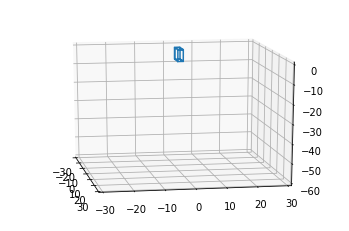

In [61]:

sizes = 30

angel_x, angel_y, angel_z = 0, 0, 0
del_x, del_y, del_z = 0, 0, 0
def update_plot(frame_number, plot):
    global angel_x, angel_y, angel_z
    global del_x, del_y, del_z
    row_gyro = data_gyro[frame_number]
    row_acc = data_acc[frame_number]
    newx, newy, newz = 0.0, 0.0, 0.0
    t = frame_number * 50
    angel_x += float(row_gyro[0]) / 200
    angel_y += float(row_gyro[1]) / 200
    angel_z += float(row_gyro[2]) / 200
    del_x += float(row_acc[0]) / 20
    del_y += float(row_acc[1]) / 20
    del_z += float(row_acc[2]) / 20
    x, y, z = plot_theta(angel_x, angel_y, angel_z, del_x, del_y, del_z)
    
    plot.remove(plot[0])
    ax.cla()
    ax.set_xlim3d(-sizes, sizes)
    ax.set_ylim3d(-sizes, sizes)
    ax.set_zlim3d(-sizes - 30, sizes - 30)
    ax.azim = -10
    ax.elev = 14
    plot.append(ax.plot(x, z, y))

x, y, z = plot_theta(angel_x, angel_y, angel_z, 0, 0, 0)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.cla()
ax.set_xlim3d(-sizes, sizes)
ax.set_ylim3d(-sizes, sizes)
ax.set_zlim3d(-sizes, sizes)
ax.azim = -10
ax.elev = 14

plot = [ax.plot(x, z, y, color='0.75')]
theta = 0


ani = animation.FuncAnimation(fig, update_plot, 100, fargs=(plot), interval=100)

In [62]:
fn = 'plot_surface_animation_funcanimation'
ani.save(fn+'.mp4',writer='ffmpeg',fps=10)
ani.save(fn+'.gif',writer='imagemagick',fps=10)

In [63]:
plt.rcParams['animation.html'] = 'html5'
ani